# Evaluation of surface pressure coefficient - OAT15A

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import average_surface_data

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

ref_data = "../exp_data/oat15a/"
run = "/media/andre/Elements/naca0012_shock_buffet/run/"
output = "./output/"
!mkdir -p output

## Exerimental datasets

The datasets are digitized versions of the results reported in:

- [Deck 2005](https://arc.aiaa.org/doi/10.2514/1.9885)
- [Huang et al. 2012](https://link.springer.com/article/10.1007%2Fs11433-011-4601-9)
- [Grossi et al. 2014](https://arc.aiaa.org/doi/10.2514/1.J052873)
- [Fukushima et al. 2018](https://arc.aiaa.org/doi/10.2514/1.J056537)

In [2]:
# experimental data
pstat = 1e5     # Pa
Uinf = 250.755   # m/s
rinf = 1.186    # kg/m^3
exp_cp_25 = pd.read_csv(f"{ref_data}exp_cp_25.csv", header=0, names=["x", "cp"])
exp_cp_25.cp *= -1
exp_cp_35 = pd.read_csv(f"{ref_data}exp_cp_35.csv", header=0, names=["x", "cp"])
exp_cp_35.cp *= -1
exp_p_rms = pd.read_csv(f"{ref_data}exp_p_rms.csv", header=0, names=["x", "p_rms"])
exp_p_rms.p_rms /= (pstat - 0.5*rinf*Uinf**2)
# Deck 2005
deck_cp_25_up = pd.read_csv(f"{ref_data}deck_cp_25_upper.csv", header=0, names=["x", "cp"])
deck_cp_25_low = pd.read_csv(f"{ref_data}deck_cp_25_lower.csv", header=0, names=["x", "cp"])
deck_cp_25_low.x = deck_cp_25_low.x.values[::-1]
deck_cp_25_low.cp = deck_cp_25_low.cp.values[::-1]
deck_cp_25 = pd.concat((deck_cp_25_up, deck_cp_25_low))
deck_cp_25.cp *= -1
deck_cp_35_up = pd.read_csv(f"{ref_data}deck_cp_35_upper.csv", header=0, names=["x", "cp"])
deck_cp_35_low = pd.read_csv(f"{ref_data}deck_cp_35_lower.csv", header=0, names=["x", "cp"])
deck_cp_35_low.x = deck_cp_35_low.x.values[::-1]
deck_cp_35_low.cp = deck_cp_35_low.cp.values[::-1]
deck_cp_35 = pd.concat((deck_cp_35_low, deck_cp_35_up))
deck_cp_35.cp *= -1
deck_p_rms = pd.read_csv(f"{ref_data}deck_p_rms.csv", header=0, names=["x", "p_rms"])
deck_p_rms.p_rms /= (pstat - 0.5*rinf*Uinf**2)
# Grossi et al. 2014
grossi_cp_25_up = pd.read_csv(f"{ref_data}grossi_cp_25_upper.csv", header=0, names=["x", "cp"])
grossi_cp_25_low = pd.read_csv(f"{ref_data}grossi_cp_25_lower.csv", header=0, names=["x", "cp"])
grossi_cp_25_low.x = grossi_cp_25_low.x.values[::-1]
grossi_cp_25_low.cp = grossi_cp_25_low.cp.values[::-1]
grossi_cp_25 = pd.concat((grossi_cp_25_up, grossi_cp_25_low))
grossi_cp_35_up = pd.read_csv(f"{ref_data}grossi_cp_35_upper.csv", header=0, names=["x", "cp"])
grossi_cp_35_low = pd.read_csv(f"{ref_data}grossi_cp_35_lower.csv", header=0, names=["x", "cp"])
grossi_cp_35_low.x = grossi_cp_35_low.x.values[::-1]
grossi_cp_35_low.cp = grossi_cp_35_low.cp.values[::-1]
grossi_cp_35 = pd.concat((grossi_cp_35_low, grossi_cp_35_up))
# Fukushima et al. 2018
fuku_cp_35_up = pd.read_csv(f"{ref_data}fukushima_cp_35_upper.csv", header=0, names=["x", "cp"])
fuku_cp_35_low = pd.read_csv(f"{ref_data}fukushima_cp_35_lower.csv", header=0, names=["x", "cp"])
fuku_cp_35_low.x = fuku_cp_35_low.x.values[::-1]
fuku_cp_35_low.cp = fuku_cp_35_low.cp.values[::-1]
fuku_cp_35 = pd.concat((fuku_cp_35_low, fuku_cp_35_up))
# Huang et al. 2012
huang_cp_35_up = pd.read_csv(f"{ref_data}huang_cp_35_upper.csv", header=0, names=["x", "cp"])
huang_cp_35_low = pd.read_csv(f"{ref_data}huang_cp_35_lower.csv", header=0, names=["x", "cp"])
huang_cp_35_low.x = huang_cp_35_low.x.values[::-1]
huang_cp_35_low.cp = huang_cp_35_low.cp.values[::-1]
huang_cp_35 = pd.concat((huang_cp_35_low, huang_cp_35_up))

In [9]:
path = f"{run}oat15_25_saiddes_ref0/postProcessing/surface/"
data_a25_0 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.05, 0.11, symmetric=False)
path = f"{run}oat15_25_saiddes_ref1/postProcessing/surface/"
data_a25_1 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.05, 0.11, symmetric=False)

Found 3333 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_25_saiddes_ref0/postProcessing/surface/
Available time range t=3e-05...0.09999s
Computing statistics for t=0.05001...0.09999s (1666 snapshots)
Found 2656 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_25_saiddes_ref1/postProcessing/surface/
Available time range t=3e-05...0.07968s
Computing statistics for t=0.05001...0.07968s (989 snapshots)


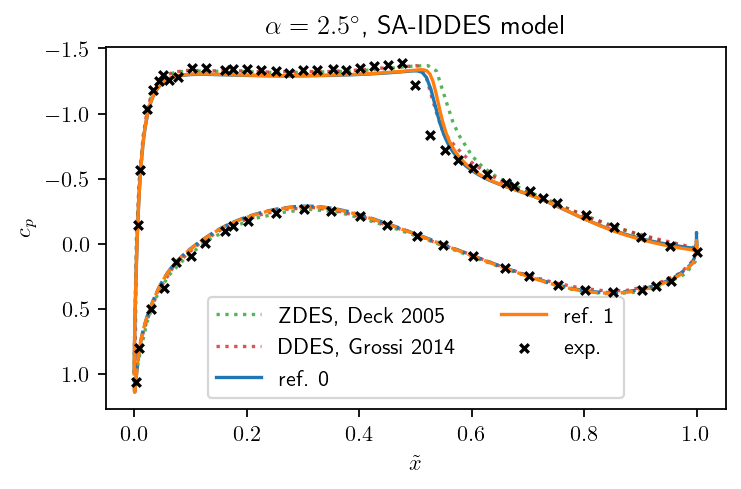

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

ax.plot(deck_cp_25.x, deck_cp_25.cp, ls=":", c="C2", alpha=0.8, label="ZDES, Deck 2005")
ax.plot(grossi_cp_25.x, grossi_cp_25.cp, ls=":", c="C3", alpha=0.8, label="DDES, Grossi 2014")
ax.scatter(exp_cp_25.x, exp_cp_25.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp.")
ax.plot(data_a25_0[0], data_a25_0[2], c="C0", ls="-", label="ref. 0")
ax.plot(data_a25_0[1], data_a25_0[3], c="C0", ls="--")
ax.plot(data_a25_1[0], data_a25_1[2], c="C1", ls="-", label="ref. 1")
ax.plot(data_a25_1[1], data_a25_1[3], c="C1", ls="--")
ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=2, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 2.5^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "oat15_cp_a25.svg", bbox_inches="tight")
plt.savefig(output + "oat15_cp_a25.pdf", bbox_inches="tight")

In [3]:
path = f"{run}oat15_35_saiddes_ref0/postProcessing/surface/"
data_a35_0 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.055, 0.065, symmetric=False)
path = f"{run}oat15_35_saiddes_ref1/postProcessing/surface/"
data_a35_1 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.055, 0.065, symmetric=False)
path = f"{run}oat15_35_saiddes_ref0_z32/postProcessing/surface/"
data_a35_z32_0 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.035, 0.06, symmetric=False)
path = f"{run}oat15_35_saiddes_ref1_z32/postProcessing/surface/"
data_a35_z32_1 = average_surface_data(path, "total(p)_coeff_airfoil.raw", 0.01, 0.06, symmetric=False)

Found 3333 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref0/postProcessing/surface/
Available time range t=3e-05...0.09999s
Computing statistics for t=0.05499...0.06501s (334 snapshots)
Found 3333 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref1/postProcessing/surface/
Available time range t=3e-05...0.09999s
Computing statistics for t=0.05499...0.06501s (334 snapshots)
Found 1541 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref0_z32/postProcessing/surface/
Available time range t=3e-05...0.04623s
Computing statistics for t=0.03501...0.04623s (374 snapshots)
Found 565 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/oat15_35_saiddes_ref1_z32/postProcessing/surface/
Available time range t=3e-05...0.01695s
Computing statistics for t=0.00999...0.01695s (232 snapshots)


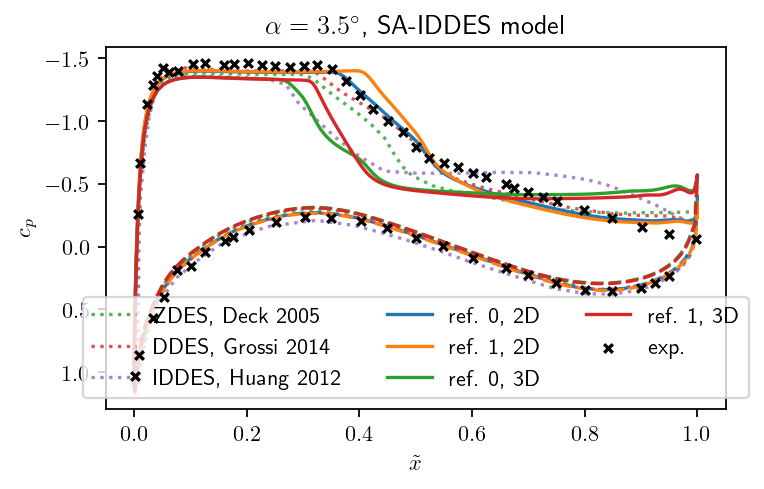

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
lw = 1.5
ms = 15

ax.plot(deck_cp_35.x, deck_cp_35.cp, ls=":", c="C2", alpha=0.8, label="ZDES, Deck 2005")
ax.plot(grossi_cp_35.x, grossi_cp_35.cp, ls=":", c="C3", alpha=0.8, label="DDES, Grossi 2014")
ax.plot(huang_cp_35.x, huang_cp_35.cp, ls=":", c="C4", alpha=0.8, label="IDDES, Huang 2012")
ax.scatter(exp_cp_35.x, exp_cp_35.cp, marker="x", s=ms, color="k", lw=lw, zorder=10, label="exp.")
ax.plot(data_a35_0[0], data_a35_0[2], c="C0", ls="-", label="ref. 0, 2D")
ax.plot(data_a35_0[1], data_a35_0[3], c="C0", ls="--")
ax.plot(data_a35_1[0], data_a35_1[2], c="C1", ls="-", label="ref. 1, 2D")
ax.plot(data_a35_1[1], data_a35_1[3], c="C1", ls="--")
ax.plot(data_a35_z32_0[0], data_a35_z32_0[2], c="C2", ls="-", label="ref. 0, 3D")
ax.plot(data_a35_z32_0[1], data_a35_z32_0[3], c="C2", ls="--")
ax.plot(data_a35_z32_1[0], data_a35_z32_1[2], c="C3", ls="-", label="ref. 1, 3D")
ax.plot(data_a35_z32_1[1], data_a35_z32_1[3], c="C3", ls="--")

ax.set_xlabel(r"$\tilde{x}$")
ax.legend(ncol=3, loc="lower center")
    
ax.set_ylabel(r"$c_p$")
ax.set_title(r"$\alpha = 3.5^\circ$, SA-IDDES model")
plt.gca().invert_yaxis()
plt.savefig(output + "oat15_cp_a35.svg", bbox_inches="tight")
plt.savefig(output + "oat15_cp_a35.pdf", bbox_inches="tight")

TypeError: cannot unpack non-iterable AxesSubplot object

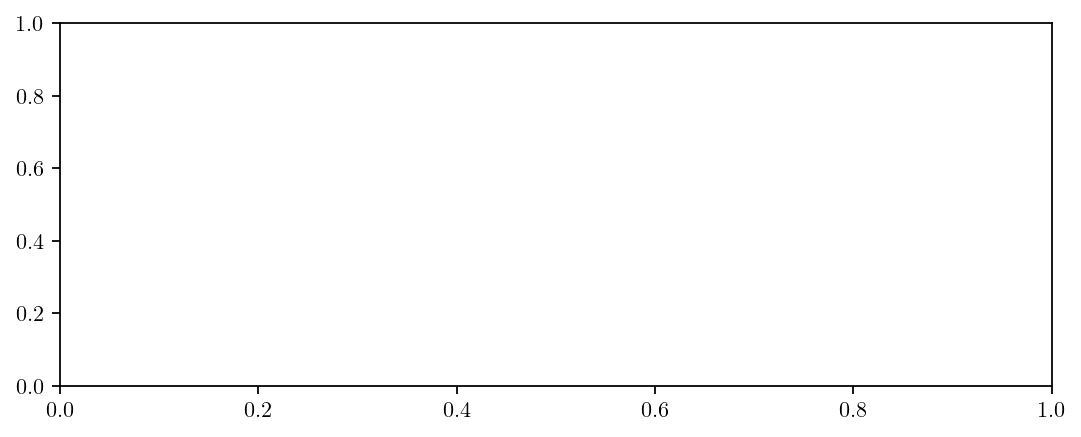

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(8, 3), sharey=True)
ax1.scatter(exp_cp_25.x, exp_cp_25.cp, marker="x", lw=1, c="k", s=10)
ax1.plot(deck_cp_25.x, deck_cp_25.cp, label="ZDES, Deck 2005")
ax1.plot(data[0], data[2], c="C4", ls="-", label=f"this work")
ax1.plot(data[1], data[3], c="C4", ls="--")

ax2.scatter(exp_cp_35.x, exp_cp_35.cp, marker="x", lw=1, c="k", s=10)
ax2.plot(deck_cp_35.x, deck_cp_35.cp, label="Deck 2005")
ax2.plot(grossi_cp_35.x, grossi_cp_35.cp, label="Grossi et al. 2014")
ax2.plot(fuku_cp_35.x, fuku_cp_35.cp, label="Fukushima et al. 2018")
ax2.plot(huang_cp_35.x, huang_cp_35.cp, label="Huang et al. 2012")
ax1.invert_yaxis()
ax1.set_ylabel(r"$c_p$")
for ax in (ax1, ax2):
    ax.set_xlabel(r"$\tilde{x}$")
ax1.legend()
ax2.legend()
plt.savefig(output + "oat15_cp_2D.svg", bbox_inches="tight")
plt.savefig(output + "oat15_cp_2D.pdf", bbox_inches="tight")

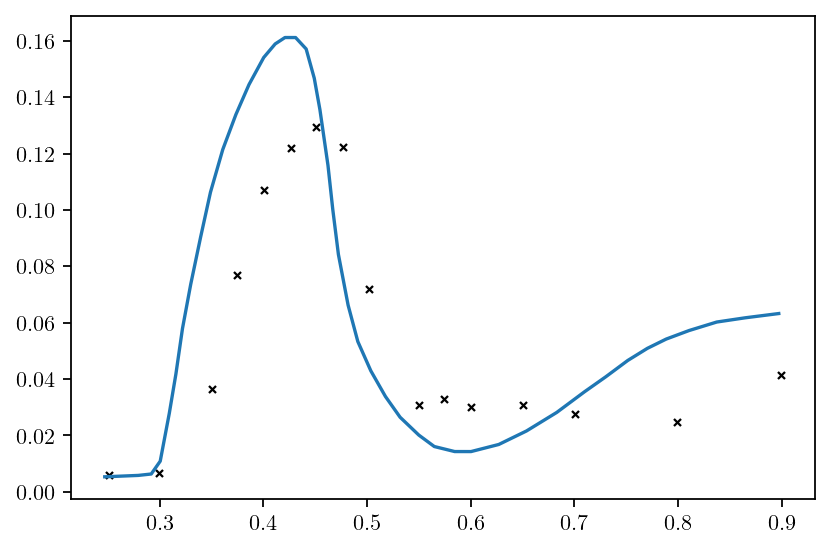

In [5]:
plt.scatter(exp_p_rms.x, exp_p_rms.p_rms, marker="x", lw=1, c="k", s=10)
plt.plot(deck_p_rms.x, deck_p_rms.p_rms, label="Deck 2005")
#plt.ylim(0, 0.17)
plt.show()